In [1]:
import pymongo
import pandas as pd
#from pandas import Series
import numpy as np
from scipy import signal
from scipy.io import wavfile
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline
#from collections import Counter
from bson.objectid import ObjectId
import json
import pprint
from pydub import AudioSegment
import urllib
import fnmatch
import os
import requests
import ffmpy
import subprocess
import librosa
import librosa.display

In [2]:
client = pymongo.MongoClient('localhost',27017)
#client = pymongo.MongoClient('localhost',32768)
db = client.get_database('b=bandhub')

In [3]:
songCol = db.get_collection('songsStream')
vidCol = db.get_collection('mergedVideos')
trackCol = db.get_collection('tracksStream')
postCol = db.get_collection('posts')
[songCol.count(), vidCol.count(), trackCol.count(), postCol.count()]

[425706, 198169, 915582, 494867]

In [4]:
NumTrackMixes = []
masterSongIDs = []
NumTrack = 3
#zeroTrackMixes = 0
pubTracks = postCol.find({'songAccess':{'$exists': True}}, {'participantsInfo':1 ,'songAccess':1, 'objectId':1})
for docs in pubTracks:
    if(docs['songAccess'] == 1):
        if(len(docs['participantsInfo']['publishedTracks']) == NumTrack):
            #ThreeTrackMixes.append(docs['objectId'])
            NumTrackMixes.append(docs['_id'])
            masterSongIDs.append(docs['objectId'])
countNumTrack = len(NumTrackMixes)

In [ ]:
pprint.pprint(NumTrackMixes[477])
pprint.pprint(masterSongIDs[477])
cursor = postCol.find({'_id' : NumTrackMixes[477]})
for doc in cursor:
    pprint.pprint(doc['objectId'])

In [ ]:
indexRequired = []
for j in range(countNumTrack):
    remix_test = NumTrackMixes[j]
    songID = masterSongIDs[j]
    
    pub_t = []
    rmt1 = postCol.find({'_id': remix_test})
    count = 3
    for docs in rmt1:
            for i in range(count):
                pub_t.append(docs['participantsInfo']['publishedTracks'][i]['_id'])
    
    songLookUp = songCol.find({'masterSongId' : songID})
    if songLookUp is -1:
        pprint.pprint('Error: SongID not found in Song Collection!')
    else:
        for songdocs in songLookUp:
            for i in range(count):
                if(str(pub_t[i]) not in songdocs['settings']):
                    continue
                elif ('effectsAudioUrl' in songdocs['settings'][str(pub_t[i])]): 
                    #print(songID)
                    gettrack = trackCol.find({'_id' : pub_t[i]})
                    for tdocs in gettrack:
                        if tdocs['startTimeValue'] is not 0:
                            indexRequired.append(j)
                else:
                    continue

In [5]:
indexRequired = [477, 589, 633, 655, 684, 856, 883, 908, 908, 943, 1005, 1018, 1034, 1087, 1106, 1155, 1156, 1162, 1185, 1270, 1275, 1290, 1294, 1295, 1302, 1315, 1332, 1334, 1356, 1370, 1377, 1378, 1434, 1443, 1446, 1451, 1469, 1481, 1499, 1515, 1537, 1545, 1570, 1570, 1594, 1601, 1602, 1604, 1636, 1636, 1652, 1655, 1659, 1660, 1660, 1662, 1667, 1674, 1674, 1675, 1682, 1696, 1724, 1728, 1730, 1732, 1741, 1750, 1754, 1756, 1760, 1768, 1771, 1780, 1786, 1792, 1793, 1798, 1800, 1800, 1802, 1811, 1811, 1816, 1820, 1822, 1824, 1825, 1827, 1830, 1830, 1846, 1851, 1856, 1856, 1867, 1879, 1889, 1889, 1894, 1894, 1900, 1901, 1903, 1908, 1908, 1909, 1921, 1925, 1930, 1931, 1931, 1933, 1954, 1961, 1971, 1976, 1979, 1983, 1987, 1989, 1993, 1994, 1996, 2000, 2001, 2002, 2006, 2009, 2011, 2014, 2019, 2019, 2025, 2028, 2029, 2035, 2035, 2042, 2046, 2046, 2047, 2047, 2048, 2071, 2077, 2080, 2086, 2097, 2104, 2111, 2114, 2121, 2133, 2137, 2137, 2140, 2146, 2149, 2149, 2150, 2163, 2167, 2171, 2171, 2175, 2183, 2183, 2189, 2190, 2191, 2191, 2193, 2193, 2193, 2199, 2200, 2202, 2209, 2221, 2221, 2225, 2240, 2242, 2247, 2249, 2271, 2271, 2279, 2279, 2284, 2289, 2292, 2292, 2306, 2317, 2327, 2328, 2332, 2332, 2334, 2335, 2364, 2370, 2373, 2374, 2388, 2399, 2410, 2410, 2418, 2433, 2435, 2435, 2441, 2448, 2448, 2461, 2464, 2470, 2475, 2475, 2476, 2479, 2490, 2493, 2495, 2502, 2502, 2510, 2525, 2530, 2541, 2541, 2543, 2545, 2549, 2553, 2554, 2560, 2567, 2573, 2574, 2577, 2584, 2585, 2585, 2599, 2607, 2611, 2618, 2623, 2623, 2627, 2627, 2629, 2642, 2646, 2652, 2660, 2663, 2668, 2675, 2689, 2689, 2693, 2699, 2704, 2707, 2714, 2715, 2720, 2727, 2731, 2739, 2739, 2740, 2740, 2747, 2748, 2749, 2753, 2757, 2763, 2765, 2777, 2778, 2786, 2798, 2810, 2811, 2811, 2822, 2836, 2839, 2842, 2852, 2857, 2858, 2859, 2870, 2875, 2876, 2897, 2900, 2904, 2905, 2916, 2917, 2932, 2934, 2942, 2943, 2947, 2953, 2955, 2959, 2961, 2962, 2972, 2985, 2987, 2988, 2990, 2995, 2997, 2999, 3009, 3010, 3011, 3012, 3015, 3022, 3029, 3029, 3033, 3033, 3034, 3038, 3040, 3043, 3054, 3058, 3062, 3063, 3071, 3077, 3083, 3086, 3095, 3099, 3100, 3100, 3104, 3104, 3106, 3110, 3115, 3118, 3123, 3126, 3127, 3142, 3149, 3153, 3162, 3162, 3167, 3181, 3182, 3183, 3189, 3190, 3208, 3210, 3215, 3215, 3221, 3222, 3224, 3231, 3232, 3234, 3238, 3238, 3242, 3242, 3244, 3247, 3259, 3263, 3265, 3271, 3271, 3275, 3276, 3282, 3294, 3294, 3297, 3308, 3310, 3310, 3313, 3314, 3315, 3320, 3335, 3345, 3358, 3365, 3370, 3371, 3374, 3383, 3383, 3385, 3386, 3391, 3395, 3402, 3403, 3408, 3412, 3412, 3414, 3415, 3415, 3424, 3432, 3444, 3447, 3448, 3450, 3460, 3461, 3468, 3478, 3478, 3479, 3480, 3482, 3484, 3484, 3488, 3488, 3493, 3494, 3497, 3511, 3511, 3512, 3514, 3519, 3520, 3520, 3521, 3523, 3523, 3528, 3531, 3543, 3545, 3547, 3551, 3551, 3562, 3564, 3574, 3585, 3588, 3588, 3594, 3596, 3611, 3611, 3613, 3626, 3631, 3632, 3642, 3642, 3647, 3656, 3657, 3671, 3671, 3673, 3674, 3675, 3676, 3679, 3685, 3692, 3693, 3702, 3711, 3712, 3717, 3719, 3723, 3728, 3730, 3733, 3737, 3738, 3739, 3742, 3743, 3748, 3749, 3750, 3755, 3756, 3759, 3764, 3765, 3765, 3766, 3775, 3783, 3788, 3788, 3793, 3795, 3795, 3796, 3798, 3808, 3811, 3813, 3819, 3821, 3833, 3835, 3840, 3840, 3843, 3852, 3852, 3853, 3859, 3860, 3872, 3875, 3879, 3880, 3884, 3885, 3895, 3896, 3897, 3901, 3902, 3906, 3907]

In [6]:
#for i in range(len(indexRequired)):
idx = indexRequired[40]
SongID = masterSongIDs[idx]
trackID = NumTrackMixes[idx]
pub_tracks = []
pub_t_vol = []
ogg_paths = []
start_times = []
track_filenames = []
songDoc = songCol.find({'masterSongId' : SongID})
rmtDoc = postCol.find({'_id': trackID})
for docs in songDoc:
    #pprint.pprint(docs)
    #pprint.pprint('============')
    for rdocs in rmtDoc:
        for i in range(NumTrack):
            pub_tracks.append(rdocs['participantsInfo']['publishedTracks'][i]['_id'])
    #pprint.pprint(len(pub_tracks))
    for i in range(NumTrack):
        pub_t_vol.append(docs['settings'][str(pub_tracks[i])]['volume'])
        if('effectsAudioUrl' in docs['settings'][str(pub_tracks[i])]): 
            ogg_paths.append(docs['settings'][str(pub_tracks[i])]['effectsAudioUrl'])
            gettrack = trackCol.find({'_id' : pub_tracks[i]})
            for tdocs in gettrack:
                start_times.append(tdocs['startTimeValue'])
        else:
            gettrack = trackCol.find({'_id' : pub_tracks[i]})
            for tdocs in gettrack:
                #pprint.pprint(tdocs)
                ogg_paths.append(tdocs['audioChannels'][0]['fileUrl'])
                start_times.append(tdocs['startTimeValue'])
for file in ogg_paths:
    filePath = file.split('/')
    track_filenames.append(filePath[- 1])
pprint.pprint(pub_t_vol)
pprint.pprint('============')
pprint.pprint(track_filenames)
pprint.pprint('============')
pprint.pprint(start_times)

[0, 1, 0.52]
'============'
[u'b2852149-f12e-4564-8771-27f7a1a2dc72.ogg',
 u'e9119201-1645-48f4-adc4-d79e3f976b01.ogg',
 u'c30ff682-1c2f-4597-8f6b-aab23f690068.ogg']
'============'
[0, 0, 59446]


In [7]:
path = '/scratch/rrs432/tracks'
#os.mkdir(path)
os.chdir(path)

! rm -rf *.ogg *.wav

for i in range(NumTrack):
    r = requests.get(ogg_paths[i])
    filename = ogg_paths[i].rpartition('/')[2]
    with open(filename, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=128):
            fd.write(chunk)
print('All published tracks downloaded successfully')

pointer = vidCol.find({'songId': SongID})
for songdocs in pointer:
    premix = songdocs['oggMergedVideoUrl']

r = requests.get(premix)
filename = premix.rpartition('/')[2]
with open(filename, 'wb') as fd:
    for chunk in r.iter_content(chunk_size=128):
        fd.write(chunk)

print('BandHub Mix Video downloaded successfully')
print('============')
!ls
print('============')

All published tracks downloaded successfully
BandHub Mix Video downloaded successfully
b2852149-f12e-4564-8771-27f7a1a2dc72.ogg
c30ff682-1c2f-4597-8f6b-aab23f690068.ogg
e9119201-1645-48f4-adc4-d79e3f976b01.ogg
f-7c0dc9e1-05b4-4449-8d88-7b29a78b550f.ogg


In [8]:
oggTracks = []
trackLens = []
samRates = []
for i in range(NumTrack):
    oggTrack, samRate = sf.read('/scratch/rrs432/tracks/'+track_filenames[i])
    samRates.append(samRate)
    trackLens.append(oggTrack.shape[0])
    #Convert mono to stero
    if oggTrack.ndim is not 2:
        oggTrack = np.stack((oggTrack, oggTrack), axis = 1)
    oggTracks.append(oggTrack)
    
    pprint.pprint(np.shape(oggTracks[i]))
#pprint.pprint(oggTracks[0][0:100])
pprint.pprint(trackLens)
#pprint.pprint(len(oggTracks[2]))
#pprint.pprint(np.shape(samRates))

(20566990, 2)
(21644000, 2)
(20469312, 2)
[20566990, 21644000, 20469312]


In [9]:
if (min(samRates) == max(samRates)):
    mixsr = samRates[0] 
else:
    pprint.pprint('Warning: Sample rates unequal')
pprint.pprint(mixsr)

44100


In [10]:
masterLen = max(trackLens)
pprint.pprint(masterLen)

21644000


In [11]:
for i in range(NumTrack):
    diff = np.zeros(((masterLen - trackLens[i]),2))
    #pprint.pprint(np.shape(diff))
    #pprint.pprint(np.shape(oggTracks[i]))
    oggTracks[i] = np.vstack((oggTracks[i], diff))
    pprint.pprint(np.shape(oggTracks[i]))

(21644000, 2)
(21644000, 2)
(21644000, 2)


In [12]:
for premix in os.listdir('.'):
    if fnmatch.fnmatch(premix, 'f-*'):
        rename_cmd = ['mv', premix, 'premix.ogg']
        s = subprocess.call(rename_cmd)
        if s is 0:
            print('success')

success


In [13]:
convert_cmd = ['ffmpeg', '-i', 'premix.ogg', '-vsync', '1', '-async', '1', '-vn', 'premix.wav']
subprocess.call(convert_cmd)

0

In [14]:
mixOgg = 0
for i in range(NumTrack):
    mixOgg += (pub_t_vol[i]*np.array(oggTracks[i]))
sf.write('mixed.wav', mixOgg / np.max(np.abs(mixOgg)), mixsr)

(21644000, 2)
(21644000, 2)
0


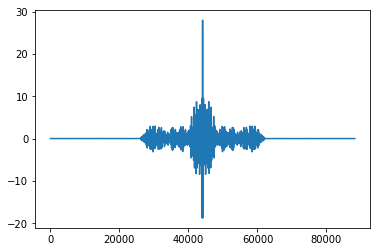

In [15]:
sampleLen = 44100
boolLen = 0
mixTrack, sr = sf.read('mixed.wav')
premixTrack, sr = sf.read('premix.wav')
if len(premixTrack) > len(mixTrack):
    diffZ = np.zeros(((len(premixTrack)-len(mixTrack)),2))
    mixTrack = np.vstack((mixTrack, diffZ))
else:
    diffZ = np.zeros(((len(mixTrack)-len(premixTrack)),2))
    premixTrack = np.vstack((premixTrack, diffZ))
    boolLen = -1
#pprint.pprint(np.shape(mixTrack))
#pprint.pprint(np.shape(diffZ))

pprint.pprint(np.shape(mixTrack))
pprint.pprint(np.shape(premixTrack))
x = np.correlate(mixTrack[:sampleLen,1], premixTrack[:sampleLen,1], 'full')

plt.plot(x)
offset = np.argmax(x, axis=None)
offset = (2*sampleLen - 1)/2 - offset
print(offset)
# offZ = np.zeros((offset,2))
# #offset = signal.argrelmax(x, axis=0, order=1, mode='clip')
# print(np.shape(offset))
if boolLen is 0:
    premixTrack = np.roll(premixTrack, -offset)
else:
    mixTrack = np.roll(mixTrack, -offset)
#     #diffZ = np.zeros(((len(mixTrack)-len(premixTrack)),2))
#     premixTrack = np.vstack((premixTrack, offZ))
sf.write('premix_off.wav', premixTrack, mixsr)

0.999969482421875
0.999969482421875


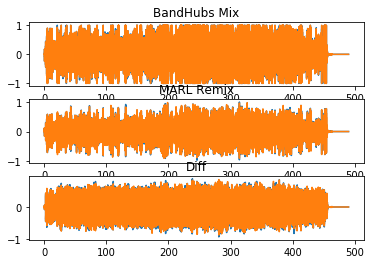

In [16]:
diffMix = premixTrack - mixTrack
print(np.amax(premixTrack))
print(np.amax(mixTrack))
time = np.linspace(0,len(premixTrack)/mixsr,num=len(premixTrack))
plt.subplot(311)
plt.title('BandHubs Mix')
plt.plot(time,premixTrack)
plt.subplot(312)
plt.title('MARL Remix')
plt.plot(time,mixTrack)
plt.subplot(313)
plt.title('Diff')
plt.plot(time,diffMix)

In [7]:
path = '/scratch/rrs432/tracks'
#os.mkdir(path)
os.chdir(path)

In [17]:
mix_spec, sr = librosa.load('mixed.wav')
premix_spec, sr = librosa.load('premix_off.wav')
diff_ref = np.amax(premix_spec)

(1025, 21137)


Text(0.5,1,u'BandHub MiX Spectrogram')

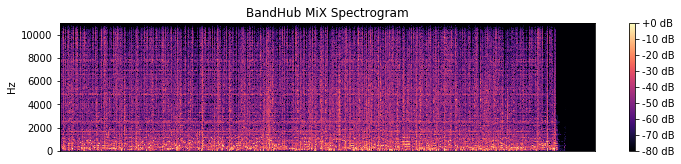

In [15]:
premix_data = librosa.amplitude_to_db(librosa.stft(premix_spec), ref=np.max)
print(np.shape(premix_data))

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(premix_data, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('BandHub Mix Spectrogram')

(1025, 21137)


Text(0.5,1,u'MARL RemiX Spectrogram')

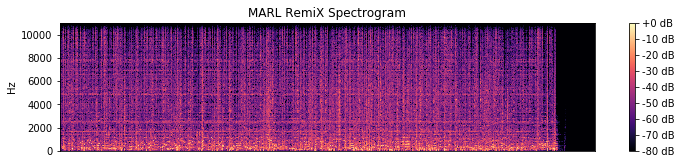

In [10]:
mix_data = librosa.amplitude_to_db(librosa.stft(mix_spec), ref=np.max)
print(np.shape(mix_data))
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 2)
librosa.display.specshow(mix_data, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('MARL Remix Spectrogram')

Text(0.5,1,u'Diff Spectrogram')

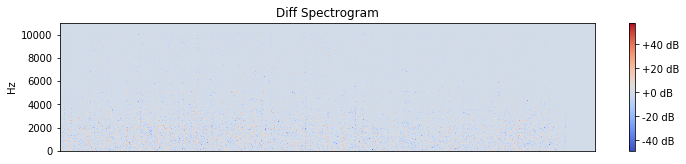

In [21]:
diff_data = np.subtract(premix_data,mix_data)
#diff_data = librosa.amplitude_to_db(diff_spec, ref=diff_ref)
#print(np.shape(diff_spec))
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 3)
librosa.display.specshow(diff_data, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Diff Spectrogram')